<a href="https://colab.research.google.com/github/Sp-supriya/HCDS-Projects/blob/main/Project_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Automate Sentiment Analysis of Textual Comments and Feedback**

In [ ]:
!pip install textblob
!python -m textblob.download_corpora

# Optional (for advanced analysis)
!pip install transformers torch


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.9 MB/s eta 

In [ ]:
comments = [
    "The product is amazing!",
    "I hate the way it works.",
    "It’s okay, nothing special.",
    "Great service and support.",
    "Very disappointed with the results."
]

In [ ]:
import pandas as pd

# Example data
data = {
    'feedback': [
        "The product is amazing!",
        "I hate the way it works.",
        "It’s okay, nothing special.",
        "Great service and support.",
        "Very disappointed with the results."
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save DataFrame to CSV
df.to_csv('feedback.csv', index=False)


In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))
comments = df['feedback'].dropna().tolist()


Saving feedback.csv to feedback (1).csv


In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

results = []

for comment in comments:
    sentiment = get_sentiment(comment)
    results.append({"Comment": comment, "Sentiment": sentiment})

# Display results
import pandas as pd
result_df = pd.DataFrame(results)
result_df.head()


,Comment,Sentiment
0,The product is amazing!,Positive
1,I hate the way it works.,Negative
2,"It’s okay, nothing special.",Positive
3,Great service and support.,Positive
4,Very disappointed with the results.,Negative


<ipython-input-7-510745ae0f65>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=result_df, x='Sentiment', palette='Set2')


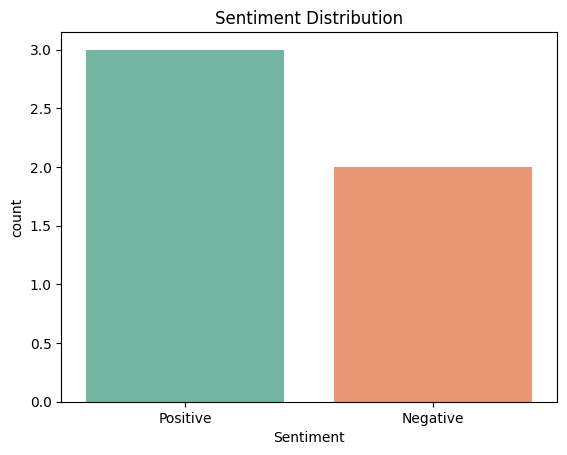

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=result_df, x='Sentiment', palette='Set2')
plt.title("Sentiment Distribution")
plt.show()


In [ ]:
result_df.to_csv("sentiment_results.csv", index=False)
files.download("sentiment_results.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>